# Advanced Regression - House Pricing in Australia

Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

#### Objective:
The company is looking at prospective properties to buy to enter the market. Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

#Options to print all rows and columns
pd.set_option('max.rows',None)
pd.set_option('max.columns',None)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# hide warnings
import warnings
warnings.filterwarnings('ignore')


## 1. Data Understanding

In [2]:
# Read data, Setting na_values explicitly for some columns as there are valid NAs in the data set.
df = pd.read_csv('train.csv',na_values={'LotFrontage':['NA'], 'MasVnrType':['NA', 'None'], 
                                        'MasVnrArea':['NA'], 'GarageYrBlt':['NA']}, keep_default_na=False)
#Print top 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [3]:
#Print data frame info to inspect
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

#### There are 1460 rows with 81 columns. There are few null values exist in columns like MasVnrType and GarageYrBuilt. There seems to be many categorical columns exist in the data set. 

In [4]:
#Print stats for numerical variables
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Data Cleaning

In [5]:
# Function to Print null percentages with percentage greater than the given threshold.
#If threshold is not specified, pritns all null percentages
def get_null_perc(df, thresh = None):
    null_perc = round(100 * df.isnull().sum()/len(df), 2)
    if thresh == None :
        return null_perc
    else :
        return null_perc[null_perc > thresh]

In [6]:
# Print columns having null values and their percentage of nulls
get_null_perc(df, 0)

LotFrontage    17.74
MasVnrType     59.73
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [7]:
#Drop columns with more than 40% nulls
cols = get_null_perc(df,40).index

train = df.copy()
train = train.drop(columns=cols)
print('Dropped Columns:',list(cols))

Dropped Columns: ['MasVnrType']


In [8]:
#Check the data frame shape after dropping
train.shape

(1460, 80)

In [9]:
#Print number of unique values in each column to identify categorical columns
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          6
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

#### Separate columns into continuous and categorical

In [10]:
#Print columns by their type to separate them
cat_cols = train.select_dtypes('object').columns
int_cols = train.select_dtypes('int64').columns
float_cols = train.select_dtypes('float64').columns

print('Categorical Columns Length:{}, Columns:{}'.format(len(cat_cols),cat_cols))
print('Integer Columns Length:{}, Columns:{}'.format(len(int_cols),int_cols))
print('Float Columns Length:{}, Columns:{}'.format(len(float_cols),float_cols))

Categorical Columns Length:42, Columns:Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')
Integer Columns Length:35, Columns:Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'Hal

In [11]:
#As there are many columns, separate them for easy handling

#Object Type Categorical Columns
obj_cat_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] #42

#Numeric Type Categorical columns
num_cat_cols = ['MSSubClass', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd',   
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
          'MoSold', 'YrSold', 'GarageYrBlt'] # 17

#Continuous Columns
cont_cols = ['LotFrontage', 'LotArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
            'MasVnrArea', 'LowQualFinSF','3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal' ] #19

#Just verify number of columns
len(obj_cat_cols + num_cat_cols + cont_cols)

78

### 2.1 Highly Skewed Variables
Variables which are highly skewed by a single category are not useful in the model. We can drop them.

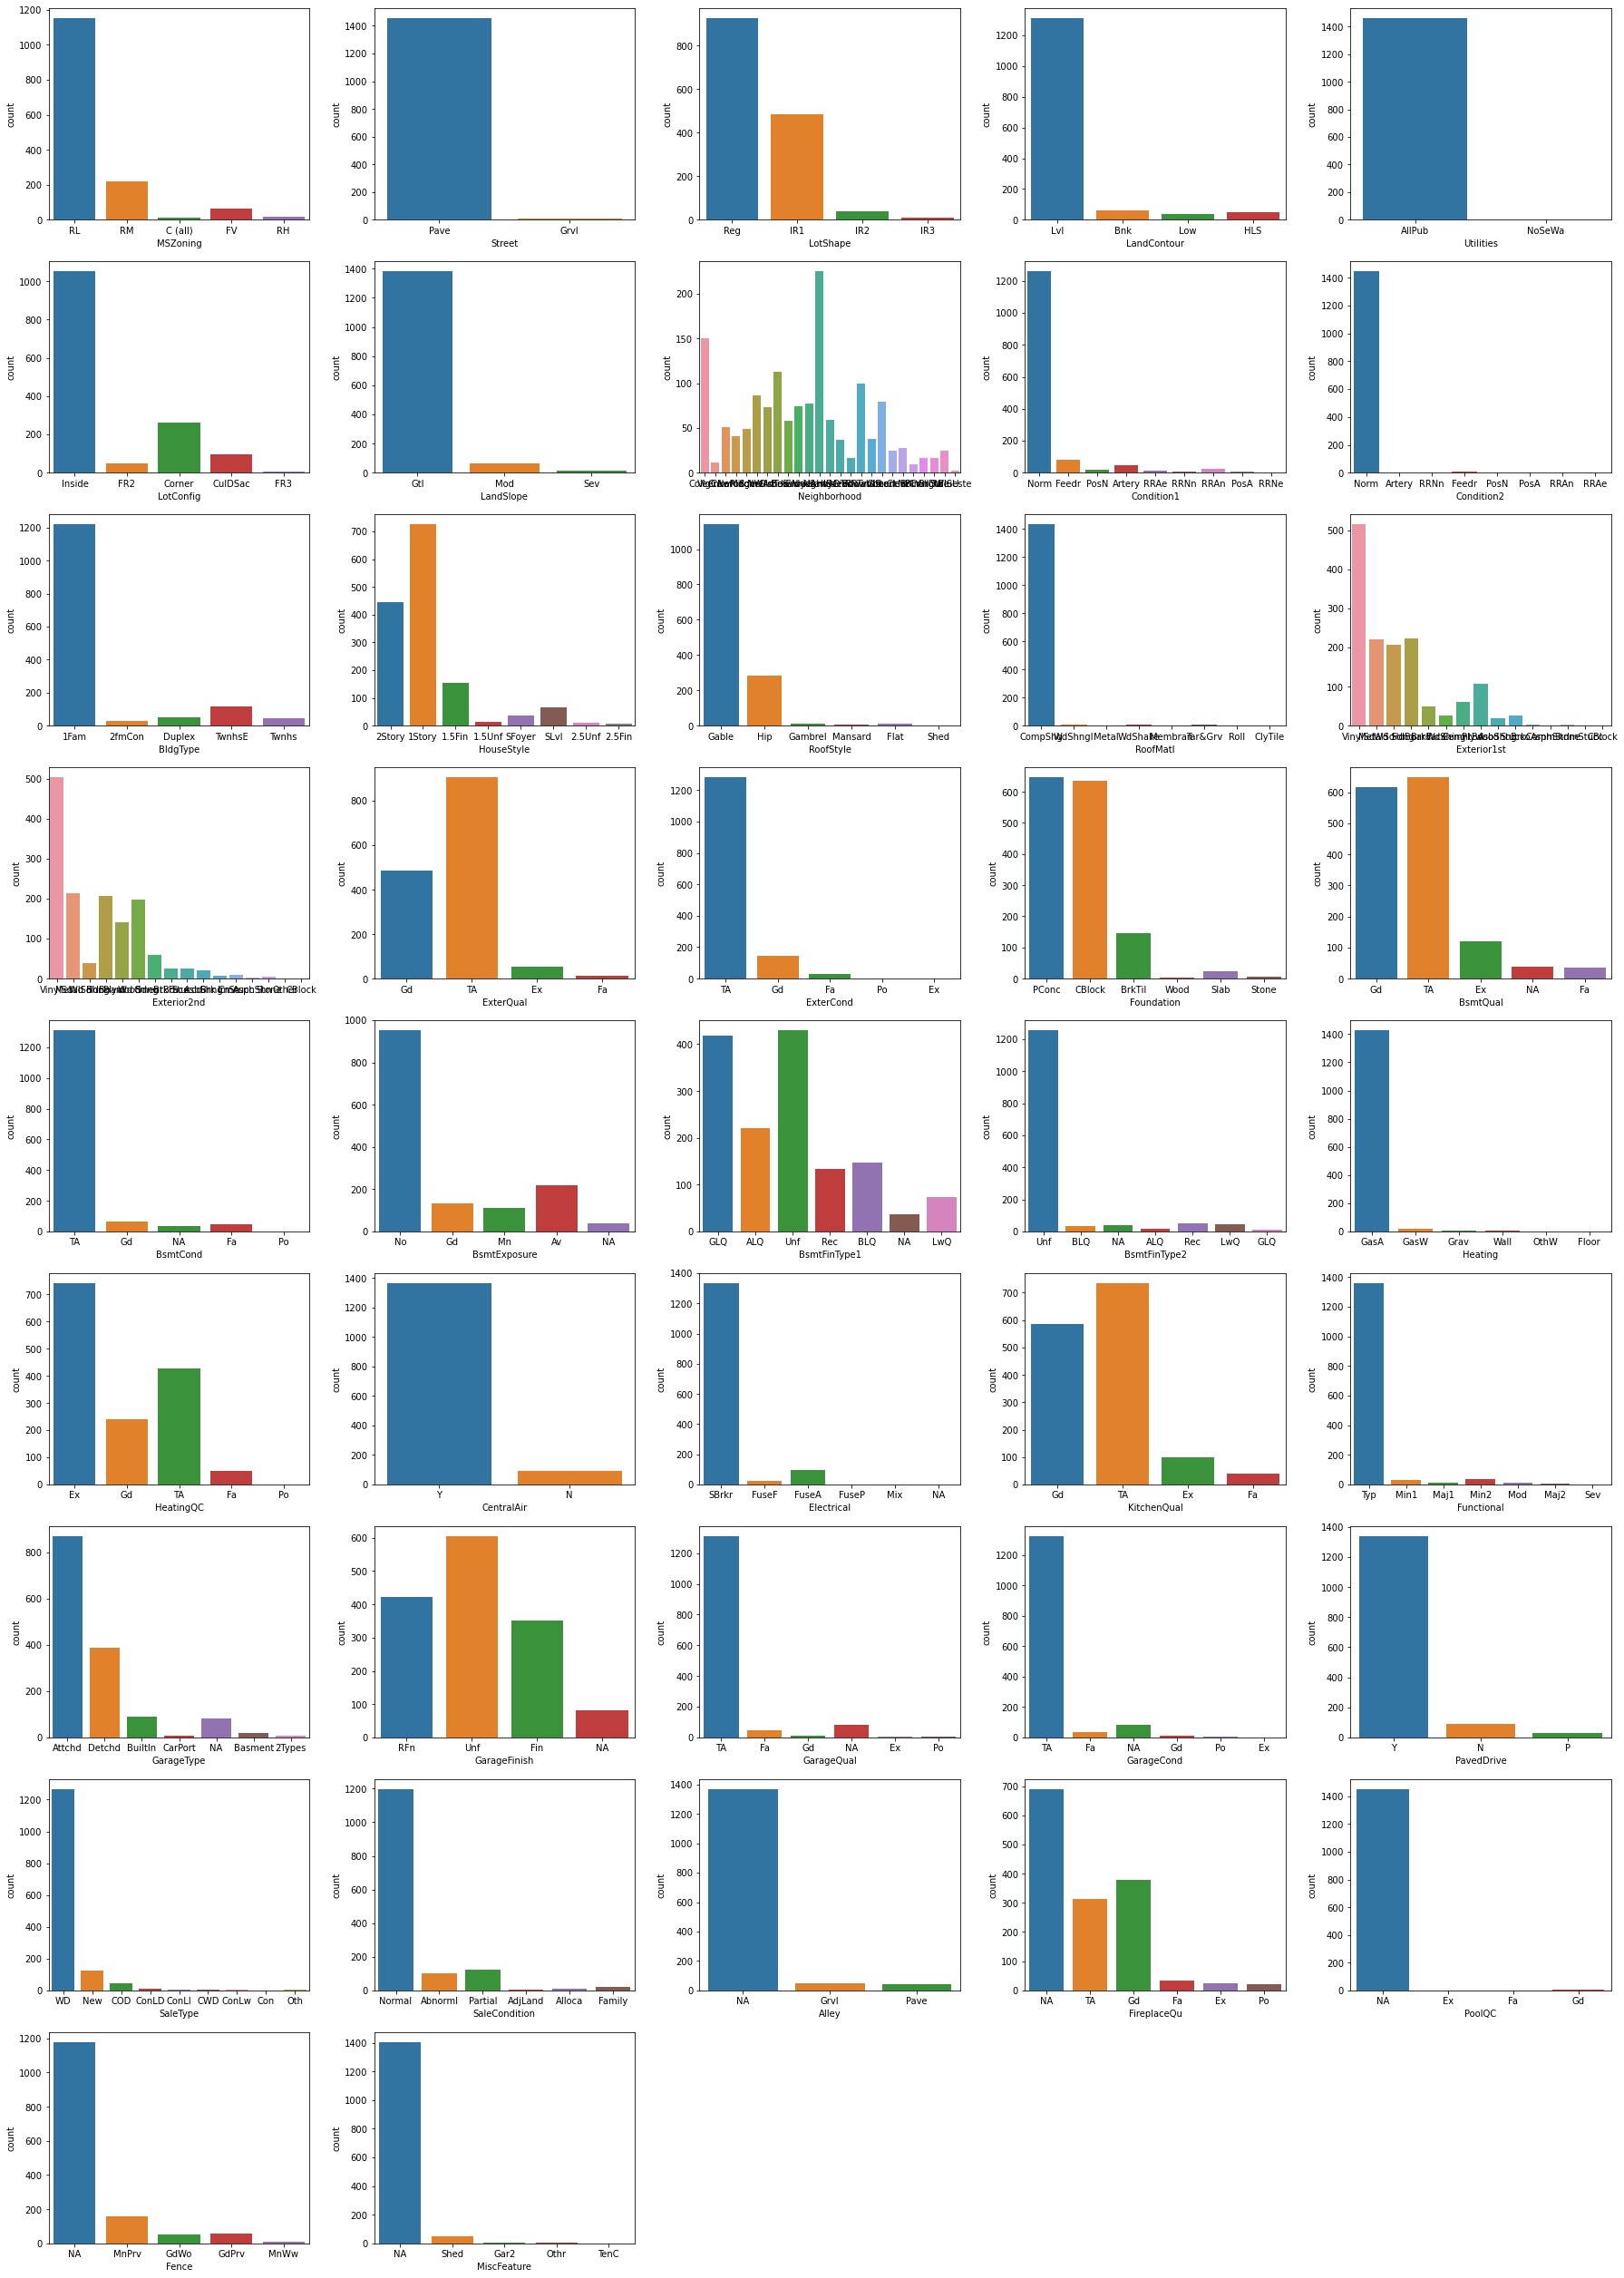

In [12]:
plt.figure(figsize=(25,35))

#Check skewness in the categorical variables by looing at counts of each category
#Draw Count plots for all object type categorical columns
for i, col in enumerate(obj_cat_cols):
    plt.subplot(9,5,i+1)
    sns.countplot(train[col])
plt.tight_layout()

####  Following columns are highly skewed and are not useful for modeling: Street, LandContour, Utilities, LandSlope, Condition2, RoofMatl, ExterCond, BsmtCond, Bsmt,FinType2, Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, PaveDrive, Alley, PoolQC, MiscFeature

In [13]:
#Prepare a list of skewed columns to be dropped
skewed_cols = ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'ExterCond', 
               'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 
               'GarageQual', 'GarageCond', 'PavedDrive', 'Alley', 'PoolQC', 'MiscFeature']

# Drop variables with high skew
train = train.drop(columns=skewed_cols)

#Update the list
obj_cat_cols = [col for col in obj_cat_cols if col not in skewed_cols]

print('Dropped Columns:', skewed_cols)

Dropped Columns: ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'Alley', 'PoolQC', 'MiscFeature']


In [14]:
#Check the data frame shape after dropping columns
train.shape

(1460, 61)

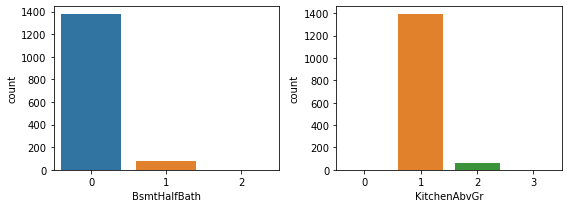

In [15]:
#Check numeric type categorical column which are highly skewed.
plt.figure(figsize=(8,3))
cols=['BsmtHalfBath','KitchenAbvGr']

#Check Skewness for couple of categorical variables with high skew
#Draw count plots for only two variables which are highly skewed to reduce the number of charts
for i, col in enumerate(cols):
    plt.subplot(1,2,i+1)
    sns.countplot(train[col])
plt.tight_layout()

#### Both BsmtHalfBath and KitchenAbvGr variables are highly skewed, we can drop them too

In [16]:
#Drop numerical categorical variables which are highly skewed
train = train.drop(columns=cols)

#Update the list
num_cat_cols = [col for col in num_cat_cols if col not in cols]

print('Dropped Columns:', cols)

Dropped Columns: ['BsmtHalfBath', 'KitchenAbvGr']


In [17]:
#Check the data frame shape after dropping columns
train.shape

(1460, 59)

### 2.2 Continuous variables with Low Variance
Columns with no or low variance are not useful in the model. we can drop them

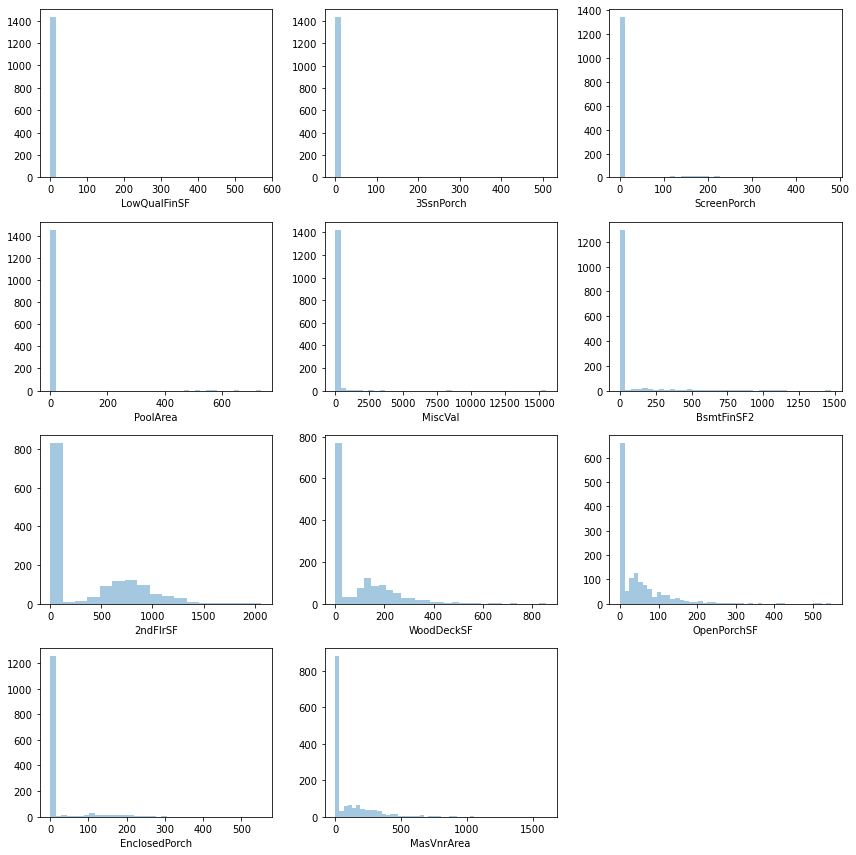

In [18]:
#Identified following continuous variables with no or low variance 
cols = ['LowQualFinSF','3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'BsmtFinSF2', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MasVnrArea']

plt.figure(figsize=(12,12))
#Check variance in continuous variables by looking at their distributions
#Drawing distribution of the identified continuous variables only to reduce number of charts
for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    sns.distplot(train[col].dropna(),kde=False)
    
plt.tight_layout()

#### As we can see, all these variables have no or very low variance. Most of the values in these variables are zero with very few non zero values. Drop them.

In [19]:
#Drop Continuous variable with low variance
train = train.drop(columns=cols)

#Update the list
cont_cols = [col for col in cont_cols if col not in cols]

print('Dropped Columns:', cols)

Dropped Columns: ['LowQualFinSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF2', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MasVnrArea']


In [20]:
#Check the data frame shape after dropping columns
train.shape

(1460, 48)

#### We have 48 columns left after cleaning data by dropping highly skewed and low variance columns

## 3. Exploratory Data Analysis

### 3.1 Univariate Analysis

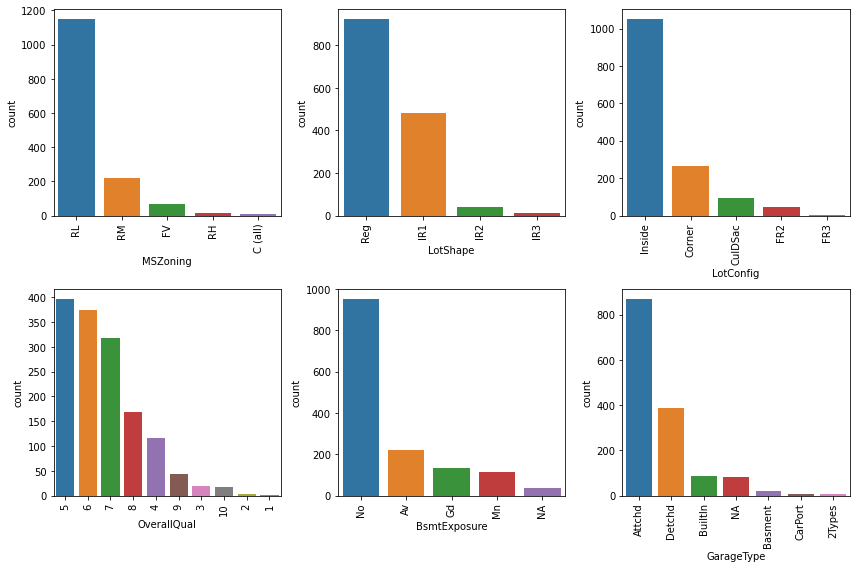

In [21]:
#Pick few categorical columns for analysis
cols = ['MSZoning', 'LotShape', 'LotConfig','OverallQual', 'BsmtExposure','GarageType']

plt.figure(figsize=(12,8))
#Draw count plots for few categorical columns to check their distributions
for i, col in enumerate(cols):
    plt.subplot(2,3,i+1)
    sns.countplot(train[col], order=train[col].value_counts().index)
    plt.xticks(rotation=90)
    
plt.tight_layout()

#### Observations:

1. Most of the houses belong to Residential Low Density (RL) Area while very few are commercial (C)
2. More than half of the houes are in regular (Reg) shape, some of the houses are slightly irregular.
3. As expected, about 75% houses are inside, few are in the corner.
4. Quality is predominantly Good(7), Average(5) and Above Average(6)
5. Usually houses don't have exposure to basement
6. More than half of the houses are attached to a Garage.

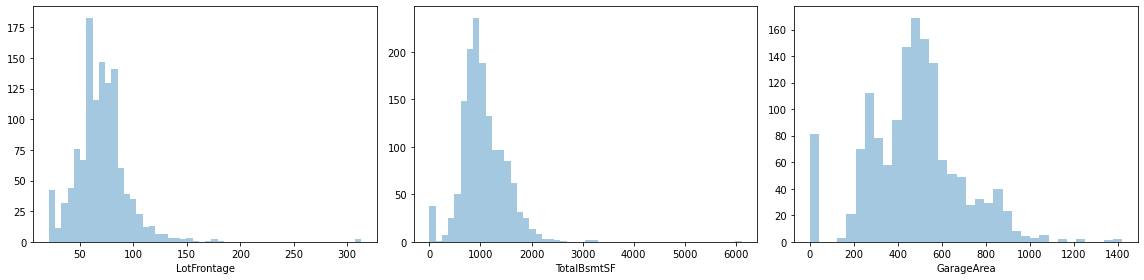

In [22]:
#Pick few numerical columns for analysis
cols = ['LotFrontage', 'TotalBsmtSF', 'GarageArea']

plt.figure(figsize=(16,4))
for i, col in enumerate(cols):
    plt.subplot(1,3,i+1)
    sns.distplot(train[col].dropna(),kde=False)
    
plt.tight_layout()

#### Observations:

1. Lot Frontage and Basement Square Feet are skewed to right with high values
2. Garage Area is almost normally distributed for houses with a Garage

### 3.2 Bivariate Analysis - Categoirical vs Numerical

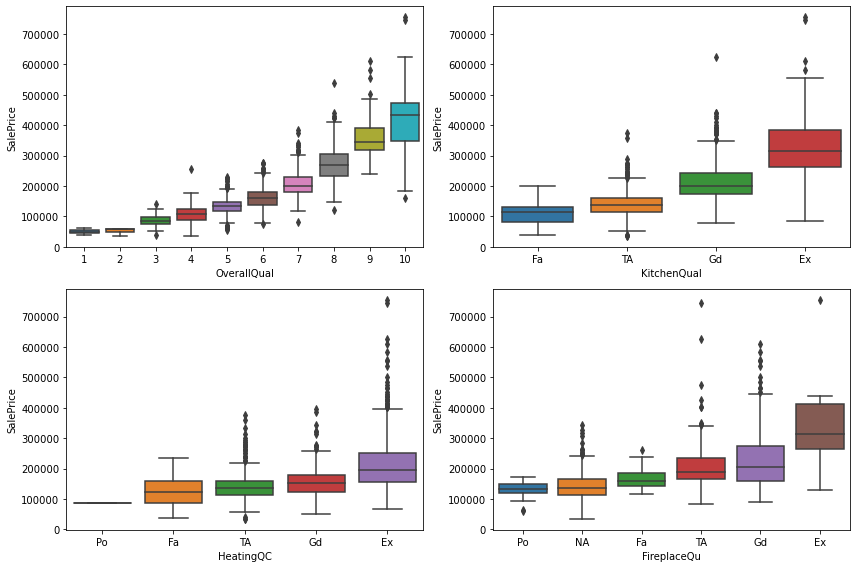

In [23]:
#Pick few categorical columns for analysis
cols = ['OverallQual','KitchenQual','HeatingQC','FireplaceQu']

plt.figure(figsize=(12, 8))
#Draw Box plots to see how Sale Price varies for categories in the selected categorical columns
for i, col in enumerate(cols):
        plt.subplot(2,2,i+1)
        sns.boxplot(x=col,y='SalePrice', data=train, order=train.groupby(col).median()['SalePrice'].sort_values().index)
        i +=1

plt.tight_layout()
plt.show()

#### Observations:
1. As the overall quality goes up, the house price also goes. There is a string correlation. Also, the variance in sale price is large for high quality house.
2. Similarly, Sale Price is high when Kitchen/Heating/FirePlace quality is good
3. Variance in sale price is more when quality of Kitchen/Heating/FirePlace gets better.

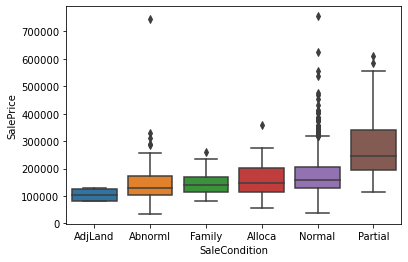

In [24]:
# Check Sale Price variation by Sale Condition as well
sns.boxplot(x='SaleCondition',y='SalePrice', data=train, 
            order=train.groupby('SaleCondition').median()['SalePrice'].sort_values().index)

#### Observations:
1. Partially completed houses go for a high price as they are under construction and hence new. Variance is also high in this case.
2. Abnormal sales due to trade or foreclosure go for less value
3. Transactions between family members are valued less 
4. Adjoining Land Purchases (AdjLand) go at a low price

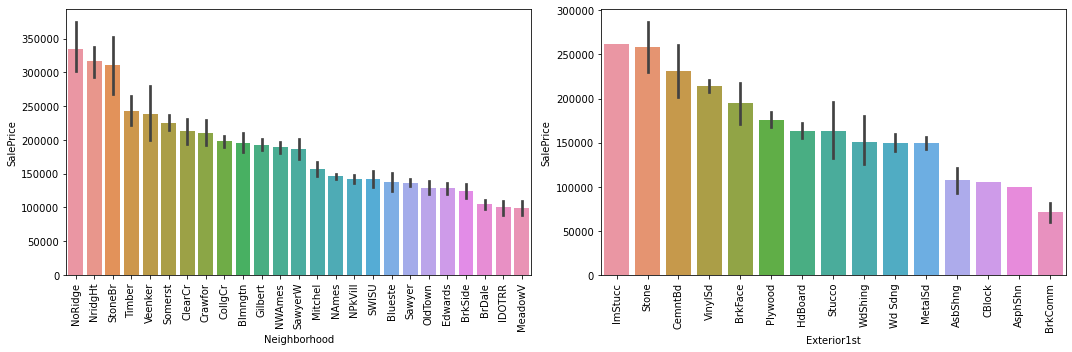

In [25]:
#Pick few categorical columns for analysis
cols = ['Neighborhood', 'Exterior1st']
plt.figure(figsize=(15, 5))

#Check the mean sale price for couple of categorical columns to identify any trends
for i, col in enumerate(cols):
    plt.subplot(1,2,i+1)
    #Draw bars sorted by sale price mean
    sns.barplot(x=col,y='SalePrice', data=train, 
                order = train.groupby(col).mean()['SalePrice'].sort_values(ascending=False).index)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### Observations:
1. Sale Price is high in North Ridge, North Ridge Heights and Stone Brook while it is low in Meadow Village, Iowa DOT and RailRoad and BriarDale areas.
2. When the exterior covering on house is made of Stone or Cement Board, it goes for a high price

### 3.3 Bivariate Analysis - Numerical vs Numerical

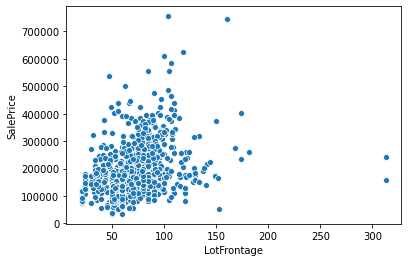

In [26]:
#Draw scatter plot of Lot Frontage vs Sale Price
sns.scatterplot(x='LotFrontage', y='SalePrice', data=train)

####  Lot Frontage has some relationship with Sale Price though it is not linear

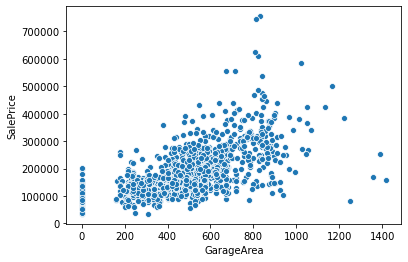

In [27]:
#Check how Sale Price varies with Garage Area
sns.scatterplot(x='GarageArea', y='SalePrice', data=train)

####  When there is a Garage, Garage Area is linearly correlated with Sale Price. It is a positive correlation

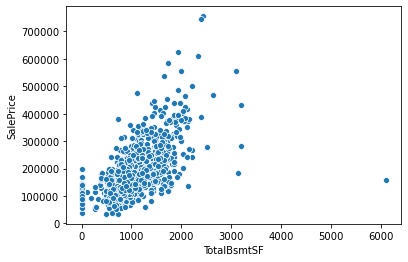

In [28]:
#Check how Sale Price varies with Total Basement Square Feet
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train)

####  When there is a Basement, Total Basement area is linearly correlated with Sale Price. More it is, more the price.

### 3.4 Bivariate Analysis - Correlations

In [29]:
#Function to sort correlation coefficients and remove dups for easy handling of correlation coefficients
#This function helps in focussing on highly correlated variables
def corr_coef_sorted(df):
    corr = df.corr()
    corr_temp = corr.unstack().reset_index()
    corr_temp = corr_temp[corr_temp.level_0.astype('str') != corr_temp.level_1.astype('str')]
    corr_temp['column_names'] = corr_temp.apply(lambda x: '_'.join(sorted([x.level_0, x.level_1])), axis=1)
    corr_temp.drop_duplicates('column_names', inplace=True)
    corr_temp = corr_temp[['level_0', 'level_1',0]]
    corr_temp.columns = ['level_0', 'level_1','coef']
    corr_temp = corr_temp.sort_values(by='coef', ascending=False)
    corr_temp = corr_temp.reset_index()
    return corr_temp

In [30]:
# check correlation on the whole data set
corr = corr_coef_sorted(train)

#Print Highly correlated variables
corr[abs(corr.coef) > 0.7]

,index,level_0,level_1,coef
0,521,GarageCars,GarageArea,0.882475
1,169,YearBuilt,GarageYrBlt,0.825667
2,317,GrLivArea,TotRmsAbvGrd,0.825489
3,261,TotalBsmtSF,1stFlrSF,0.819530
4,124,OverallQual,SalePrice,0.790982
5,324,GrLivArea,SalePrice,0.708624


In [31]:
#Getcorrelated columns with coef > 0.6 - This is to draw a heatmap on only these columns and reduce cluttering of heatmap
l0_cols = set(corr[abs(corr.coef) > 0.6 ].level_0)
l1_cols = set(corr[abs(corr.coef) > 0.6 ].level_1)

#Select both level columns for drawing heat map
corr_cols = l1_cols | l0_cols

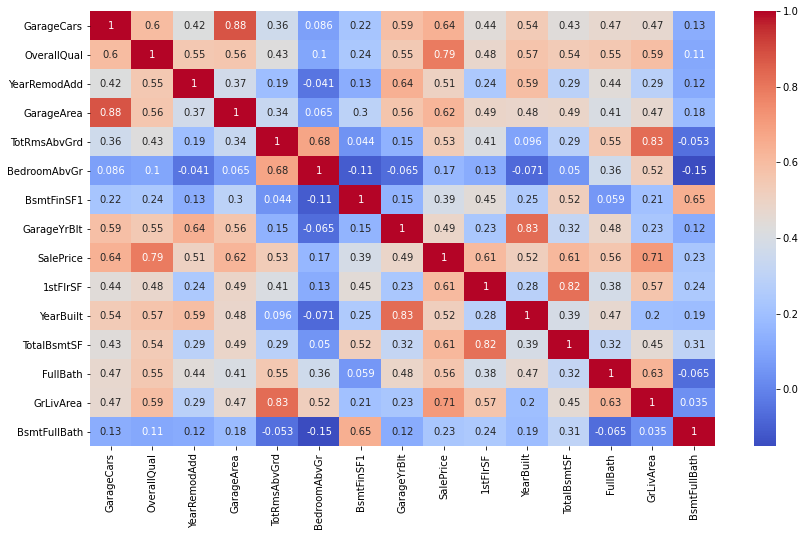

In [32]:
#Plot heatmap for highly correlated columns
plt.figure(figsize=(14, 8))
sns.heatmap(train[corr_cols].corr(), cmap='coolwarm', annot=True)

#### Observations:

1. Sale Price is highly correlated with Overall Quality, Above Ground Living Area and Year Built
2. Year Built and Garage Year Built have a stron relationshio. We can drop one of these variables.
2. Garage Area has a stron positive correlation with Garage Cars. We can drop one of these variables. 
3. Above Ground Living Area is highly correlated with TotalRooms Above ground. We can drop one of these.


## 4. More Data Cleaning

### 4.1 Drop Multicollinear Variables

In [33]:
#Drop Highly correlated variables to avoid multicollinearity
cols = ['TotRmsAbvGrd','GarageArea', 'GarageYrBlt']
train = train.drop(columns=cols)

#Update Lists
cont_cols.remove('GarageArea')
num_cat_cols = [col for col in num_cat_cols if col not in cols]

### 4.2 Impute Missing Values

In [34]:
#Check the columns having null values
get_null_perc(train,0)

LotFrontage    17.74
dtype: float64

In [35]:
val = train.LotFrontage.median()

#Replace null values in LotFrontage with median value
train['LotFrontage'] = train['LotFrontage'].fillna(val)

In [36]:
#Check Null Percentages
get_null_perc(train,0)

Series([], dtype: float64)

#### No missing values now

### 4.3 Handle Outliers

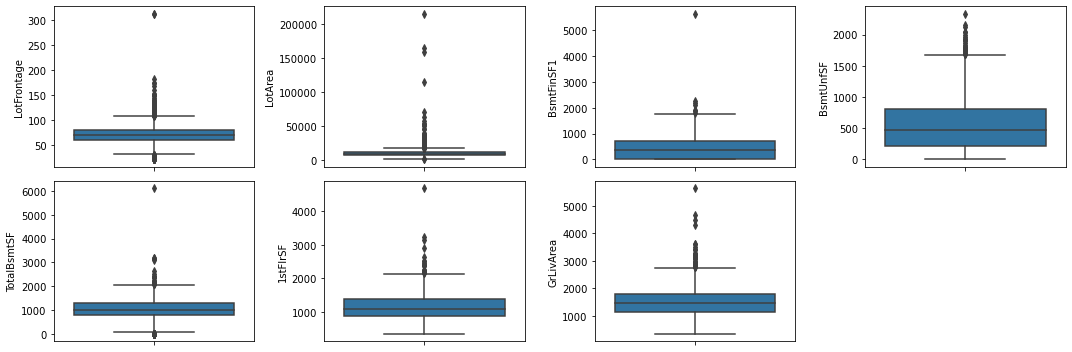

In [37]:
#DRaw box plots for all continuous variables to check if there are outliers
plt.figure(figsize=(15,5))

for i, col in enumerate(cont_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=train[col])
    
plt.tight_layout()

####  LotFrontage, BsmtFinSF1, TotalBsmtSF and 1stFlrSF seem to have outliers.

In [38]:
# Cap outliers to .99 quantile value. This is a safe threshold to cap
cols = ['LotFrontage', '1stFlrSF', 'BsmtFinSF1','TotalBsmtSF']

for col in cols:
    train.loc[train[col] > train[col].quantile(.99),col] = train[col].quantile(.99)

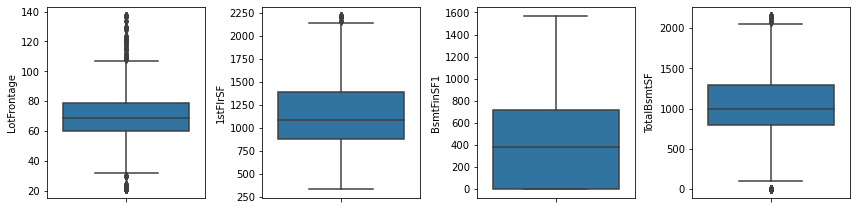

In [39]:
#Check outliers after capping 
cols = ['LotFrontage', '1stFlrSF', 'BsmtFinSF1','TotalBsmtSF']

plt.figure(figsize=(12,3))

for i, col in enumerate(cols):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=train[col])
    
plt.tight_layout()


####  Now  BsmtFinSF1, TotalBsmtSF and 1stFlrSF doesn't seem to have outliers that are standing out.

In [40]:
# Check dataframe shape after cleaning
train.shape

(1460, 45)

#### After data cleaning, we are left with 45 columns. No rows were dropped

## 5. Data Preparation

### 5.1 Encode Ordinal categorical columns

In [41]:
# Split categoical columns into ordinal and nominal. 
ordinal_cat_cols = ['BldgType', 'HouseStyle','ExterQual', 
                    'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageFinish']

nominal_cat_cols = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
 'Condition1',  'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
 'GarageType', 'SaleType', 'SaleCondition']

In [42]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,Gd,PConc,Gd,No,GLQ,706.0,150,856.0,Ex,856.0,1710,1,2,1,3,Gd,0,NA,Attchd,RFn,2,NA,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,TA,CBlock,Gd,Gd,ALQ,978.0,284,1262.0,Ex,1262.0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,NA,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,Gd,PConc,Gd,Mn,GLQ,486.0,434,920.0,Ex,920.0,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,NA,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,TA,BrkTil,TA,No,ALQ,216.0,540,756.0,Gd,961.0,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,NA,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,Gd,PConc,Gd,Av,GLQ,655.0,490,1145.0,Ex,1145.0,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,NA,12,2008,WD,Normal,250000


In [43]:
common_mapping = {'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4, 'NA' : -1}

# Use specified mapping for ordinal categorical columns
ord_col_mappings = { 'BldgType' : {'1Fam' : 4, '2fmCon' : 3, 'Duplex' : 2, 'TwnhsE' : 1, 'Twnhs' : 0},
  'HouseStyle': {'1Story':0, '1.5Fin' : 1, '1.5Unf': 2, '2Story' : 3, '2.5Unf' : 4,'2.5Fin': 5, '2.5Unf' : 4, 'SFoyer': 5, 'SLvl' : 6},
  'ExterQual': common_mapping,
  'BsmtQual': common_mapping,
  'BsmtExposure': {'No':0, 'Gd':3, 'Mn':1, 'Av':2, 'NA' : -1},
  'BsmtFinType1': {'GLQ':5, 'ALQ':4, 'Unf':0, 'Rec':3, 'BLQ':2, 'LwQ':1, 'NA': -1},
  'HeatingQC': common_mapping,
  'KitchenQual': common_mapping,
  'GarageFinish': {'RFn':1, 'Unf':0, 'Fin':2, 'NA' : -1},
}

for k, v in ord_col_mappings.items():
    train[k] = train[k].map(v)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,4,3,7,5,2003,2003,Gable,VinylSd,VinylSd,3,PConc,3,0,5,706.0,150,856.0,4,856.0,1710,1,2,1,3,3,0,NA,Attchd,1,2,NA,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,4,0,6,8,1976,1976,Gable,MetalSd,MetalSd,2,CBlock,3,3,4,978.0,284,1262.0,4,1262.0,1262,0,2,0,3,2,1,TA,Attchd,1,2,NA,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,4,3,7,5,2001,2002,Gable,VinylSd,VinylSd,3,PConc,3,1,5,486.0,434,920.0,4,920.0,1786,1,2,1,3,3,1,TA,Attchd,1,2,NA,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,4,3,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,2,BrkTil,2,0,4,216.0,540,756.0,3,961.0,1717,1,1,0,3,3,1,Gd,Detchd,0,3,NA,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,4,3,8,5,2000,2000,Gable,VinylSd,VinylSd,3,PConc,3,2,5,655.0,490,1145.0,4,1145.0,2198,1,2,1,4,3,1,TA,Attchd,1,3,NA,12,2008,WD,Normal,250000


In [44]:
train.shape

(1460, 45)

### 5.2 Create Dummy Variables

In [45]:
#Create dummy varibales for remaining nominal categorical columns
train = pd.get_dummies(train)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageCars,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,4,3,7,5,2003,2003,3,3,0,5,706.0,150,856.0,4,856.0,1710,1,2,1,3,3,0,1,2,2,2008,208500,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,4,0,6,8,1976,1976,2,3,3,4,978.0,284,1262.0,4,1262.0,1262,0,2,0,3,2,1,1,2,5,2007,181500,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,4,3,7,5,2001,2002,3,3,1,5,486.0,434,920.0,4,920.0,1786,1,2,1,3,3,1,1,2,9,2008,223500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,4,3,7,5,1915,1970,2,2,0,4,216.0,540,756.0,3,961.0,1717,1,1,0,3,3,1,0,3,2,2006,140000,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,4,3,8,5,2000,2000,3,3,2,5,655.0,490,1145.0,4,1145.0,2198,1,2,1,4,3

In [46]:
#Check the shape of dataframe after creation of dummy varibales
train.shape

(1460, 155)

#### We have 155 columns now

### 5.3 Target Variable Distribution

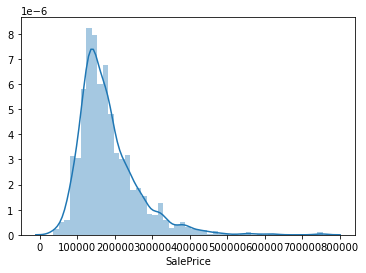

SalePrice Skewness: 1.8828757597682129


In [47]:
#Check SalPrice Distribution
sns.distplot(train.SalePrice)
plt.show()
print('SalePrice Skewness:', train.SalePrice.skew())

#### Observations:

Target Varibale is skewed to right with some house prices too high. We should bring it to a normal distribution using transformation techniques. We will do this after EDA.

### Transform Target Varibale

In [48]:
#Use Power transformer to transform SalePrice
transformer = PowerTransformer()
#Transform SalePrice
train[['SalePrice']] = transformer.fit_transform(train[['SalePrice']])

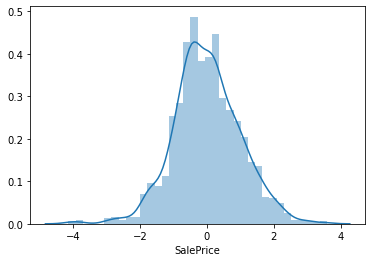

SalePrice Skewness: -0.008653670817198679


In [49]:
#Check Distribution after transformation
sns.distplot(train.SalePrice)
plt.show()
print('SalePrice Skewness:', train.SalePrice.skew())

#### Observations:

Now Target Varibale's distribution is normal and it's skew is also close to zero

### 5.4 Train and Test Split

In [50]:
#Input variables
X = train.drop(columns=['Id','SalePrice'])

#Output Variable
y = train[['SalePrice']]
print(X.shape, y.shape)

(1460, 153) (1460, 1)


In [51]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 5.5 Scale Continuous Variables

In [52]:
#Check shapre of X_train afer splitting
X_train.shape

(1168, 153)

In [53]:
#List of columns to be scaled
to_scale_cols = num_cat_cols + cont_cols + ordinal_cat_cols

In [54]:
scaler = MinMaxScaler()
#Fit train data
scaler.fit(X_train[to_scale_cols])
X_train[to_scale_cols] = scaler.transform(X_train[to_scale_cols])
X_test[to_scale_cols] = scaler.transform(X_test[to_scale_cols])

In [55]:
scaler = MinMaxScaler()
scaler.fit(y_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [56]:
y_train['SalePrice'] = scaler.transform(y_train)
y_test['SalePrice'] = scaler.transform(y_test)

In [57]:
#Inspect few rows after scaling
X_train.head()

,MSSubClass,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageCars,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
921,0.411765,0.395155,0.034948,0.50,0.166667,0.444444,0.714286,0.202899,0.883333,0.333333,0.6,0.25,0.833333,0.689388,0.080479,0.590242,0.666667,0.497491,0.351545,0.666667,0.666667,1.0,0.500,0.333333,0.000000,0.0,0.0,0.727273,0.50,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
520,1.000000,0.335023,0.044404,0.75,0.500000,0.333333,0.714286,0.202899,0.833333,0.333333,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.333333,0.190935,0.180859,0.000000,0.666667,0.0,0.375,0.333333,0.000000,0.0,0.0,0.636364,0.50,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
401,0.000000,0.377974,0.034901,1.00,0.000000,0.666667,0.428571,0.963768,0.916667,0.666667,0.8,0.75,1.000000,0.015263,0.550514,0.607875,1.000000,0.517646,0.183873,0.000000,0.666667,0.0,0.375,0.666667,0.333333,1.0,0.5,0.545455,0.00,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
280,0.235294,0.524010,0.046680,1.00,0.500000,0.666667,0.571429,0.8

In [58]:
#Print stats after scaling
X_train.describe()

,MSSubClass,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageCars,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000

# 6. Mode Buildling and Evaluation

### 6.1 Ridge Regression

In [59]:
#Function to calculate train and test r2 scores for the given model and train/test sets.
def calc_r2_score( model, dfs = [X_train, y_train, X_test, y_test] ):
    X_tr,y_tr,X_ts,y_ts = dfs[0], dfs[1], dfs[2], dfs[3]
    print('Train r2 score: ', r2_score(y_tr, model.predict(X_tr)))
    print('Test r2 score: ', r2_score(y_ts, model.predict(X_ts)))

#Function to calculate train and test Mean Absolute Errors for the given model and train/test sets.
def calc_mae( model, dfs = [X_train, y_train, X_test, y_test] ):
    X_tr,y_tr,X_ts,y_ts = dfs[0], dfs[1], dfs[2], dfs[3]
    print('Train Mean Absolute Error: ', mean_absolute_error(y_tr, model.predict(X_tr)))
    print('Test Mean Absolute Error: ', mean_absolute_error(y_ts, model.predict(X_ts)))

In [60]:
# Function to plot train and test scores for different hyper parameters
def plot_results(cv_results):
    # plotting mean test and train scoes with alpha 
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

    # plotting
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()

In [61]:
#Function to get top n features. Returns top 10 features by default
def get_top_features(coef, n=10, cols = X_train.columns):
    df_coef = pd.DataFrame({'column':cols, 'coef':coef})
    df_coef['abs_coef'] = abs(df_coef['coef'])
    return df_coef.sort_values(by='abs_coef', ascending=False)[:n][['column','coef']]

In [62]:
#Check for different alpha values
params = {'alpha':[0.1, .5, 1, 5, 10, 50, 200, 500]}

#Instantiate Ridge Regression
rr = Ridge()

#Run Grid Search CV for different alphas with scoring as negative mean absolute error and 5 folds
gcv = GridSearchCV(rr, param_grid=params, scoring='neg_mean_absolute_error', cv=5,
                   n_jobs=-1, verbose=1, return_train_score=True)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1, 5, 10, 50, 200, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [63]:
#Get the best alpha
gcv.best_params_

{'alpha': 1}

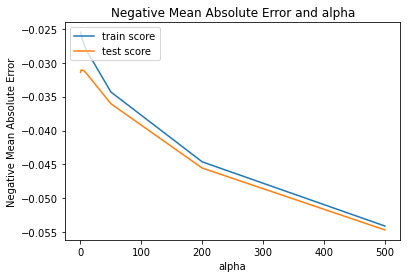

In [64]:
#Plot alpha vs train/test scores
cv_results =pd.DataFrame(gcv.cv_results_)
plot_results(cv_results)

In [65]:
#Print R2 Score and absolute Mean Error
calc_r2_score(gcv.best_estimator_)
print('-----')
calc_mae(gcv.best_estimator_)

Train r2 score:  0.9134052466019861
Test r2 score:  0.902812093237121
-----
Train Mean Absolute Error:  0.02634873896699731
Test Mean Absolute Error:  0.03000252950242826


#### This is a decent model with a good r2 score on both train and test. Let us run one more iteration around previous best alpha

In [66]:
# Run one more iteration around previous best alpha of 1
params = {'alpha':[0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.1, 1.3, 1.5, 1.7, 1.9, 2, 2.3]}

#Instantiate Ridge Regression
rr = Ridge()

#Run Grid Search CV for different alphas with scoring as negative mean absolute error
gcv = GridSearchCV(rr, param_grid=params, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1, return_train_score=True)
gcv.fit(X_train, y_train)

Fitting 3 folds for each of 13 candidates, totalling 39 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  39 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.1, 1.3, 1.5,
                                   1.7, 1.9, 2, 2.3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [67]:
#Get the best alpha
gcv.best_params_

{'alpha': 1.7}

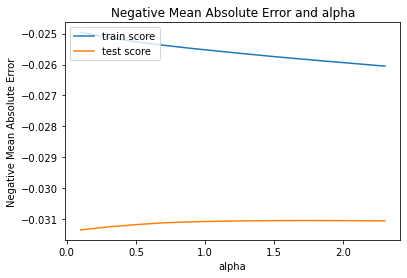

In [68]:
#Plot alpha vs train/test scores
cv_results =pd.DataFrame(gcv.cv_results_)
plot_results(cv_results)

####  Best alpha seems to be at 1.7 as scores are good and train/test gap is minimized. Before this value, train/test gap is more and after this value scores are going down , hence this is an optimal value.

In [69]:
#Build a model with best alpha
rr_opt_alpha = 1.7
rr = Ridge(alpha=rr_opt_alpha)
rr.fit(X_train,  y_train)

#Print scores
calc_r2_score(rr)
print()
calc_mae(rr)

Train r2 score:  0.9122813119472181
Test r2 score:  0.9031499848945146

Train Mean Absolute Error:  0.026543041102325582
Test Mean Absolute Error:  0.029982028693418542


#### Test Score and error have improved a bit compared to the model with alpha as 1

In [70]:
# Print Top 10 Coefficients
rr_top_features = get_top_features(rr.coef_[0])
print(rr_top_features)

                 column      coef
5           OverallQual  0.136968
18            GrLivArea  0.113725
6           OverallCond  0.090263
22         BedroomAbvGr  0.079430
17             1stFlrSF  0.076621
29     MSZoning_C (all) -0.072315
26           GarageCars  0.070078
15          TotalBsmtSF  0.064656
20             FullBath  0.057686
85  Exterior1st_BrkComm -0.051135


#### Results:
1. Top 5 predictors are: 
    1. Overall Quality
    2. Above Ground Living Area
    3. Overall Condition
    4. Number of Bedrooms above ground
    5. Area of first floor
2. Overall Quality and Above Ground Living Area has highest impact on Sale Price compared to other features. As they go high, Sale Price also goes high.
3. When the house is in commercial zone or when exterior of house is made of common bricks, house price becomes less. These variables have a negative impact on sale price

### 6.2 Lasso Regression

In [71]:
#Check for different alpha values
params = {'alpha':[0.1, .5, 1, 5, 10, 50, 200, 500]}

#Instantiate Lasso Regression
lasr = Lasso()

#Run Grid Search CV for different params with scoring as negative mean absolute error and 5 folds 
gcv = GridSearchCV(lasr, param_grid=params, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=1, return_train_score=True)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1, 5, 10, 50, 200, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [72]:
gcv.best_params_

{'alpha': 0.1}

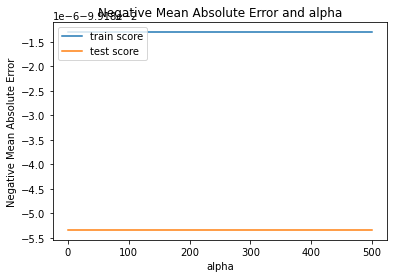

In [73]:
cv_results =pd.DataFrame(gcv.cv_results_)
plot_results(cv_results)

In [74]:
calc_r2_score(gcv.best_estimator_)
calc_mae(gcv.best_estimator_)

Train r2 score:  0.0
Test r2 score:  -0.01372713711271567
Train Mean Absolute Error:  0.09918048001767882
Test Mean Absolute Error:  0.10487706328532152


#### Observations:

With aplha of 0.1, model is an underfit model, worse than a random model. It doesn't perform well on both train and test sets. Find a better alpha around the previous alpha 

In [75]:
#Try out alpha values around previous best
params = {'alpha':[0, .00001, .00005, 0.0001, .0005, .001, .01, .05, .1, .11]}

lasr = Lasso()

#Run Grid Search CV for different params with scoring as negative mean absolute error and 5 folds 
gcv = GridSearchCV(lasr, param_grid=params, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=1, return_train_score=True)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.01,
                                   0.05, 0.1, 0.11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [76]:
gcv.best_params_

{'alpha': 0.0001}

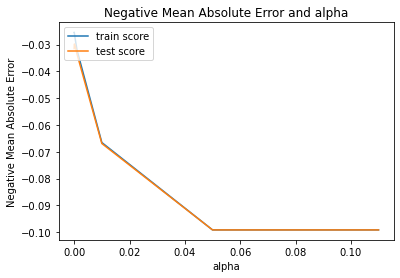

In [77]:
#Plot alpha vs train/test scores
cv_results =pd.DataFrame(gcv.cv_results_)
plot_results(cv_results)

#### Observations:

For all the alpha values choosen, train/test score gap is negligible. Best alpha seems to be at a value very close to 0,  as scores are good at this point. Let us build our final model with alpha as 0.0001

### 6.3 Final Model

In [78]:
#Build a model with best alpha
lasr_opt_alpha = 0.0001
lasr = Lasso(lasr_opt_alpha)

#Fit Model
lasr.fit(X_train, y_train)

#Print Scores
calc_r2_score(lasr)
calc_mae(lasr)

Train r2 score:  0.9088283607595806
Test r2 score:  0.909346359488131
Train Mean Absolute Error:  0.02648830493830572
Test Mean Absolute Error:  0.028791132487763132


#### Observations:

This model is the best. Both train and test scores have improved compared to all previous models using Lasso and Ridge, in fact test r2 score is slightly higher than train score, sounds like most generalized model with low bias and variance. Hence this is our Final Model.

#### Top Predictors

In [79]:
lasr_top_features = get_top_features(lasr.coef_)
lasr_top_features

,column,coef
18,GrLivArea,0.172078
5,OverallQual,0.162581
29,MSZoning_C (all),-0.095282
6,OverallCond,0.093949
26,GarageCars,0.074045
17,1stFlrSF,0.067628
22,BedroomAbvGr,0.067016
15,TotalBsmtSF,0.057854
85,Exterior1st_BrkComm,-0.049945
20,FullBath,0.045439


In [80]:
#Check if the top 10 features selected by Lasso and Ridge are same
s1 = set(rr_top_features['column'])
s2 = set(lasr_top_features['column'])
print('Difference between top 10 features selcted by Ridge and Lasso:',len(s1-s2))

Difference between top 10 features selcted by Ridge and Lasso: 0


In [81]:
#Get all coefficients sorted, specified 160 as number of features to select all features
all_coef = get_top_features(lasr.coef_,160)

print('Number of features not selected by Lasso:', len(all_coef[all_coef.coef == 0]))

Number of features not selected by Lasso: 64


#### Results:
Top 10 features are same in both Ridge and Lasso, However there is a difference in coefficients which makes the order of importance differ from Ridge. Lasso also dropped around 64 features from the model by making their coefficients zero. It performed feature selection for us which makes the model more generic and simpler than Ridge.

1. Top 5 predictors are: 
    1. Above Ground Living Area
    2. Overall Quality
    3. Commercial Zone
    4. Overall Condition
    5. Garage Car Capacity

2. Observe that Commercial Zone and Garage Car capacity made it to top 5 in Lasso compared with Ridge.

2. Above Ground Living Area and Overall Quality has highest impact on Sale Price compared to other features. As they go high, Sale Price also goes high. This is same as Ridge.

3. When the house is in commercial zone or when exterior of house is made of common bricks, house price becomes less. These variables have a negative impact on sale price

## 7. Assignment Part II

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [82]:
print('Ridge Regression Optimal Alpha:',rr_opt_alpha,', Lasso Regression Optimal Alpha:',lasr_opt_alpha)

Ridge Regression Optimal Alpha: 1.7 , Lasso Regression Optimal Alpha: 0.0001


#### With double optimal alpha - Ridge

In [83]:
#Ridge Regression with double the optimal alpha 
rr2 = Ridge(alpha=rr_opt_alpha*2)
rr2.fit(X_train,  y_train)

#Print scores both
print('Ridge Regression with alpha:', rr_opt_alpha)
calc_r2_score(rr)
calc_mae(rr)
print(get_top_features(rr.coef_[0]))

print('--------------------------')

print('Ridge Regression with alpha:', rr_opt_alpha*2)
calc_r2_score(rr2)
calc_mae(rr2)
print(get_top_features(rr2.coef_[0]))

Ridge Regression with alpha: 1.7
Train r2 score:  0.9122813119472181
Test r2 score:  0.9031499848945146
Train Mean Absolute Error:  0.026543041102325582
Test Mean Absolute Error:  0.029982028693418542
                 column      coef
5           OverallQual  0.136968
18            GrLivArea  0.113725
6           OverallCond  0.090263
22         BedroomAbvGr  0.079430
17             1stFlrSF  0.076621
29     MSZoning_C (all) -0.072315
26           GarageCars  0.070078
15          TotalBsmtSF  0.064656
20             FullBath  0.057686
85  Exterior1st_BrkComm -0.051135
--------------------------
Ridge Regression with alpha: 3.4
Train r2 score:  0.909674579872421
Test r2 score:  0.9020000636707528
Train Mean Absolute Error:  0.026923394395345676
Test Mean Absolute Error:  0.03009582237264965
                  column      coef
5            OverallQual  0.123884
18             GrLivArea  0.094524
6            OverallCond  0.083047
17              1stFlrSF  0.077735
22          BedroomAbvGr

#### Observations:

Ridge regression performed better with optimal alpha. However, even with double the optimal alpha, it performed decently good, however train and test R2 scores have gone down a bit and Mean Absolute error increased marginally. Top features differ slighly as the coefficients values have changed slightly. 

#### With double optimal alpha - Lasso

In [84]:
#Lasso Regression with double the optimal alpha 
lasr2 = Lasso(alpha=rr_opt_alpha*2)
lasr2.fit(X_train,  y_train)

#Print scores for both
print('Lasso Regression with alpha:', lasr_opt_alpha)
calc_r2_score(lasr)
calc_mae(lasr)
print(get_top_features(lasr.coef_))

print('--------------------------')

print('Lasso Regression with alpha:', lasr_opt_alpha*2)
calc_r2_score(lasr2)
calc_mae(lasr2)
print(get_top_features(lasr2.coef_))

Lasso Regression with alpha: 0.0001
Train r2 score:  0.9088283607595806
Test r2 score:  0.909346359488131
Train Mean Absolute Error:  0.02648830493830572
Test Mean Absolute Error:  0.028791132487763132
                 column      coef
18            GrLivArea  0.172078
5           OverallQual  0.162581
29     MSZoning_C (all) -0.095282
6           OverallCond  0.093949
26           GarageCars  0.074045
17             1stFlrSF  0.067628
22         BedroomAbvGr  0.067016
15          TotalBsmtSF  0.057854
85  Exterior1st_BrkComm -0.049945
20             FullBath  0.045439
--------------------------
Lasso Regression with alpha: 0.0002
Train r2 score:  0.0
Test r2 score:  -0.01372713711271567
Train Mean Absolute Error:  0.09918048001767882
Test Mean Absolute Error:  0.10487706328532152
                  column  coef
0             MSSubClass  -0.0
105  Exterior2nd_ImStucc   0.0
98   Exterior2nd_AsbShng  -0.0
99   Exterior2nd_AsphShn  -0.0
100  Exterior2nd_Brk Cmn  -0.0
101  Exterior2nd_BrkFa

#### Observations:

Lasso regression performed really well with optimal alpha. However, with double the optimal alpha, it performed badly, it is an under fit model which is worse than a Random model. Train  R2 score is zero and test R2 score is negative, Mean absolute error increased drastically. All coefficients have become zero. Hence, in this case, alpha value is very senstive for Lasso Regression.

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [85]:
#Top 5 Predictor variables in Lasso
drop_cols = list(lasr_top_features['column'][:5])
drop_cols

['GrLivArea', 'OverallQual', 'MSZoning_C (all)', 'OverallCond', 'GarageCars']

#### Observations:
Out of top 5 predictors, 'MSZoning_C (all)' is a dummy variable for feature MSZoning. If this predictor variable is not available, all other dummy variables for this feature will also be not available. Hence we need to drop those as well before creating another model

In [86]:
cols = [col for col in list(X_train.columns) if col.startswith('MSZoning')]
drop_cols = set(drop_cols+cols)
drop_cols 

{'GarageCars',
 'GrLivArea',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'OverallCond',
 'OverallQual'}

In [87]:
#Drop top predictors
X_train2 = X_train.drop(columns=drop_cols)
X_test2 = X_test.drop(columns=drop_cols)

In [88]:
#Check the shape
X_train2.shape

(1168, 144)

In [89]:
#Lasso Regression without top 5 predictor variables 
lasr3 = Lasso(alpha=lasr_opt_alpha)
lasr3.fit(X_train2,  y_train)

#Print scores
calc_r2_score(lasr3, [X_train2, y_train, X_test2, y_test])
calc_mae(lasr3, [X_train2, y_train, X_test2, y_test])

Train r2 score:  0.8795938256014384
Test r2 score:  0.8595309613363491
Train Mean Absolute Error:  0.032028527954112616
Test Mean Absolute Error:  0.03555605643148888


####  This is a decent model even after dropping the top 5 predictors. However, the train and test r2 scores have dropped significantly. This is expected as we lost most important predictors.

In [90]:
#Lasso Regression without top 5 predictor variables 
lasr3 = Lasso(alpha=lasr_opt_alpha)
lasr3.fit(X_train2,  y_train)

#Print scores
calc_r2_score(lasr3, [X_train2, y_train, X_test2, y_test])
calc_mae(lasr3, [X_train2, y_train, X_test2, y_test])
print(get_top_features(lasr3.coef_,cols=X_train2.columns))

Train r2 score:  0.8795938256014384
Test r2 score:  0.8595309613363491
Train Mean Absolute Error:  0.032028527954112616
Test Mean Absolute Error:  0.03555605643148888
                  column      coef
15              1stFlrSF  0.120726
19          BedroomAbvGr  0.114285
17              FullBath  0.091939
76   Exterior1st_BrkComm -0.076054
56  Neighborhood_StoneBr  0.064476
18              HalfBath  0.061161
44  Neighborhood_MeadowV -0.058670
13           TotalBsmtSF  0.055540
43   Neighborhood_IDOTRR -0.051825
20           KitchenQual  0.050686


In [91]:
print('Top 5 most important predictor variables now: ', list(get_top_features(lasr3.coef_,5, cols=X_train2.columns)['column']))

Top 5 most important predictor variables now:  ['1stFlrSF', 'BedroomAbvGr', 'FullBath', 'Exterior1st_BrkComm', 'Neighborhood_StoneBr']


#### Top five predictors are (After removing previous top 5 predictors) are: 
1. Area of first floor
2. Number of Bedrooms above ground
3. Number of Full Bathrooms above ground
4. Exterior Covering - Common Bricks
5. Neighborhood - Stone Brook